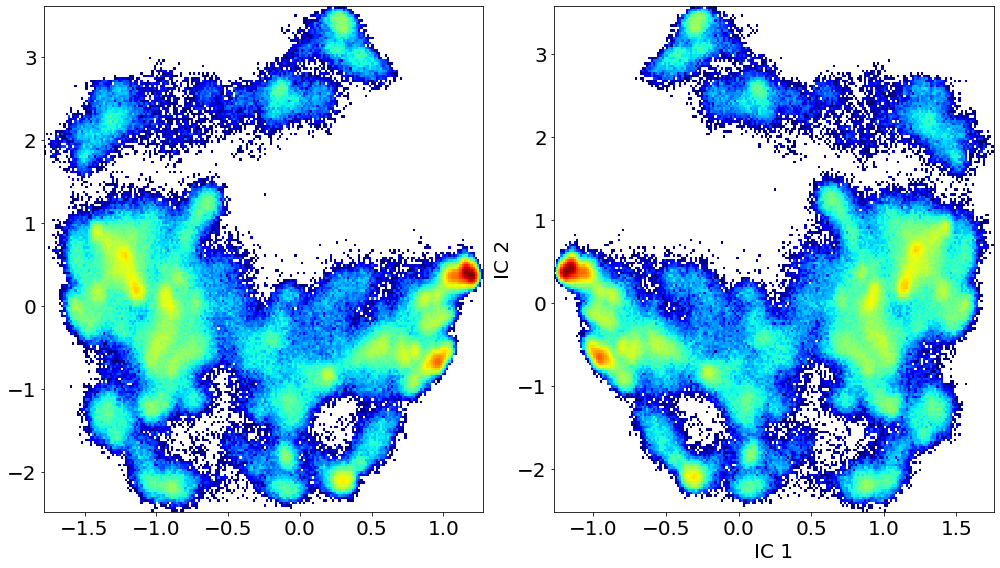

In [1]:
### IMPORT ###
import pyemma
import os, sys, glob
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

# data location
current_dir = './data'

# specify feature name used to generate VAMP / tICA
# used for parsing filenames
feat = 'CA_CA_distances'

# load in tICA object
# concatenate and transpose
tica_in = np.load(f'{current_dir}/{feat}_tica_getoutput.npy', allow_pickle = True)
tica_cat = np.concatenate(tica_in).T

# load in VAMP object
# concatenate and transpose
vamp_in = np.load(f'{current_dir}/{feat}_vamp_getoutput.npy', allow_pickle = True)
vamp_cat = np.concatenate(vamp_in).T


# specify components to visualize along x and y axis
IC_x, IC_y = 0, 1

# make figure
fig, (ax0, ax1) = plt.subplots(1, 2 , figsize=(14, 8))

# plot tica on the first axis
# VAMP on second axis    
ax0.hist2d(tica_cat[IC_x], tica_cat[IC_y], norm=LogNorm(), bins=200, cmap = 'jet')
ax1.hist2d(vamp_cat[IC_x], vamp_cat[IC_y], norm=LogNorm(), bins=200, cmap = 'jet')

# automatic adjust of all axis labels / tick sizes and other misc items
for ax_ndx in range(2):
    
    # automatic selection of axis
    my_vars = locals()  # axis naming 
    select_ax = my_vars[f'ax{ax_ndx}']
    
    select_ax.tick_params(axis='both', which='major', labelsize=20)
    select_ax.tick_params(axis='both', which='minor', labelsize=14)

# need a better labeling way. 
# label all plots?
plt.xlabel('IC 1', fontsize=20)
plt.ylabel('IC 2', fontsize=20)

fig.tight_layout()
plt.show()